# 01_hierarchical_analysis.ipynb
## Hierarchical Data Visualization - CheckPoint 2
### Strategic Market Analysis for Terra Cotta Foods (TCF) Expansion

Este notebook cumple con los requerimientos del CheckPoint 2 para visualizaci√≥n de datos jer√°rquicos, utilizando el dataset `country_gdp_population.csv` con datos de los 193 pa√≠ses miembros de la ONU.

**Contexto del Negocio:** Marco Antonelli, CEO de Terra Cotta Foods (TCF), necesita evaluar mercados para la expansi√≥n internacional hacia Am√©rica Latina y Asia. TCF es una de las distribuidoras m√°s grandes de Europa de productos alimenticios premium y materias primas.

### Objetivos Estrat√©gicos:
- **Evaluaci√≥n de Mercados:** Determinar la viabilidad econ√≥mica y potencial de alcance de la cadena de suministro de TCF en nuevos mercados
- **Jerarqu√≠a de Poder de Compra:** Identificar qu√© regiones y pa√≠ses muestran el mayor PIB (capacidad de compra) que justifica invertir en centros de distribuci√≥n
- **Evaluaci√≥n de Riesgo de Suministro:** Analizar c√≥mo la poblaci√≥n (fuerza laboral/base de consumidores) se correlaciona con el potencial econ√≥mico
- **Optimizaci√≥n de Cadena de Suministro:** Guiar la colocaci√≥n de centros de distribuci√≥n y diversificaci√≥n de proveedores


## Imports and Configuration

Importaci√≥n de todas las librer√≠as necesarias y configuraci√≥n del estilo visual.


In [2]:
# === 1. IMPORTACI√ìN Y CONFIGURACI√ìN DE LIBRER√çAS ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify
from scipy.cluster import hierarchy
from scipy.spatial import distance
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, set_link_color_palette
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.options.display.float_format = '{:,.2f}'.format

print(" Librer√≠as cargadas correctamente.")


 Librer√≠as cargadas correctamente.


## Data Loading and Preprocessing

Carga del dataset y preprocesamiento de los datos.


In [3]:
# === 2. CARGA Y PREPROCESAMIENTO DE DATOS ===

# Carga de CSV 
data = pd.read_csv("country_gdp_population.csv")

# Verificar que los datos se cargaron correctamente
print(f"Datos cargados: {len(data)} pa√≠ses")
print(f"Columnas disponibles: {list(data.columns)}")
print(f"Primeras 5 filas:")
print(data.head())
print(f"\nTipos de datos:")
print(data.dtypes)
print(f"\nValores nulos por columna:")
print(data.isnull().sum())

# Limpiar valores nulos en poblaci√≥n y PIB per c√°pita
data_clean = data.dropna(subset=['population', 'gdp_per_capita'])
print(f"\nPa√≠ses con datos completos: {len(data_clean)}")

# Crear nueva columna gdp_total = population * gdp_per_capita
data_clean['gdp_total'] = data_clean['population'] * data_clean['gdp_per_capita']
print(f"Columna gdp_total creada: population * gdp_per_capita")

# Verificar DataFrame final
print(f"\nDataFrame final con columnas: {list(data_clean.columns)}")
print(f"Primeras 3 filas del dataset limpio:")
print(data_clean.head(3))


Datos cargados: 192 pa√≠ses
Columnas disponibles: ['continent', 'country', 'population', 'gdp_per_capita']
Primeras 5 filas:
  continent       country  population  gdp_per_capita
0    Africa       Algeria    46814308        5,631.18
1    Africa        Angola    37885849        2,122.08
2    Africa         Benin    14462724        1,485.38
3    Africa      Botswana     2521139        7,695.24
4    Africa  Burkina Faso    23548781          987.32

Tipos de datos:
continent          object
country            object
population          int64
gdp_per_capita    float64
dtype: object

Valores nulos por columna:
continent          0
country            0
population         0
gdp_per_capita    18
dtype: int64

Pa√≠ses con datos completos: 174
Columna gdp_total creada: population * gdp_per_capita

DataFrame final con columnas: ['continent', 'country', 'population', 'gdp_per_capita', 'gdp_total']
Primeras 3 filas del dataset limpio:
  continent  country  population  gdp_per_capita          gdp_tot

/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3876036293.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['gdp_total'] = data_clean['population'] * data_clean['gdp_per_capita']


## Part 1 ‚Äì Treemap (Static & Interactive)

Los treemaps son ideales para mostrar proporciones jer√°rquicas. Aqu√≠ creamos tanto una versi√≥n est√°tica con squarify como una interactiva con Plotly.


=== PART 1: TREEMAP ANALYSIS ===

1. Treemap Est√°tico con Squarify


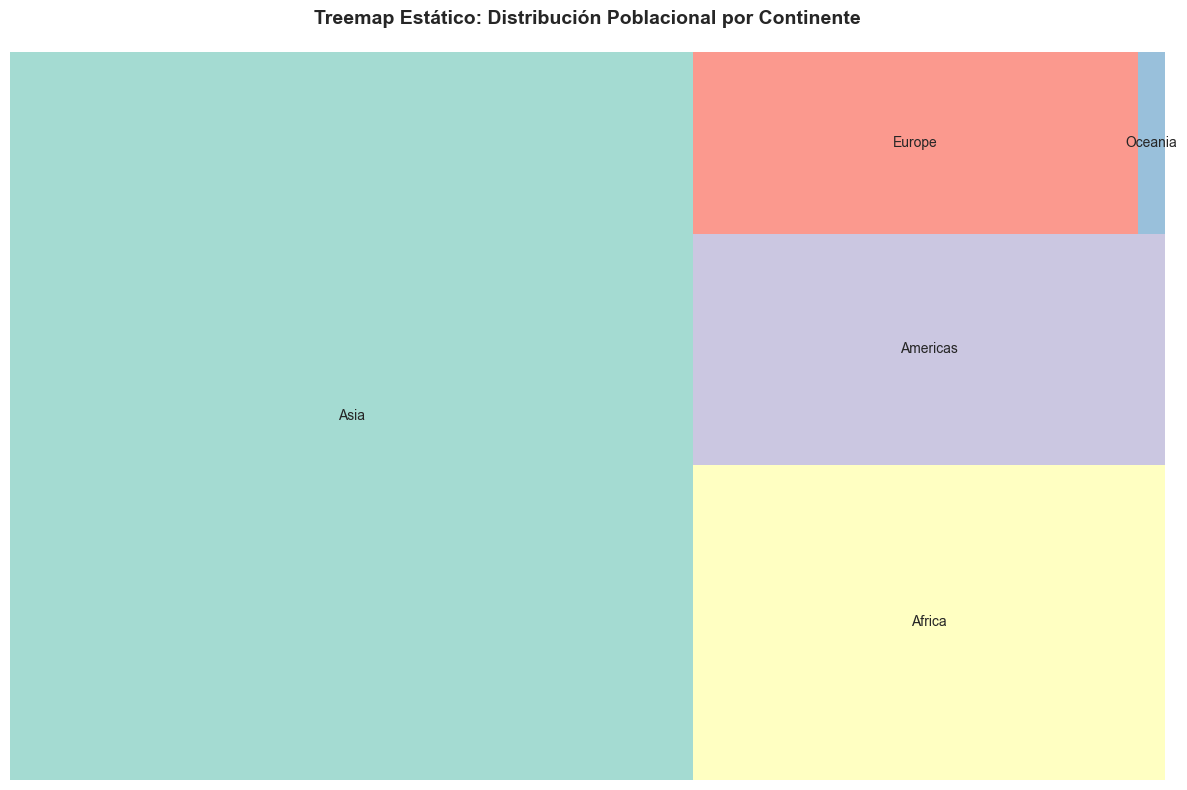


2. Treemap Interactivo con Plotly


 Treemaps generados correctamente

 AN√ÅLISIS DE TREEMAPS:
Regiones con mayor concentraci√≥n poblacional:
- Asia: 4,564,400,743 habitantes (59.2%)
- Africa: 1,363,579,157 habitantes (17.7%)
- Americas: 1,000,399,073 habitantes (13.0%)

Total poblaci√≥n mundial: 7,716,393,194 habitantes


In [4]:
# ============================================================================
# PART 1: TREEMAP (STATIC & INTERACTIVE) - COMPLETO
# ============================================================================

print("=== PART 1: TREEMAP ANALYSIS ===")

# --- Treemap est√°tico con Squarify ---
print("\n1. Treemap Est√°tico con Squarify")
plt.figure(figsize=(12, 8))

# Agrupar por continente
continent_pop = data_clean.groupby('continent')['population'].sum().reset_index()
continent_pop = continent_pop.sort_values('population', ascending=False)

# Crear treemap est√°tico
squarify.plot(sizes=continent_pop['population'], 
              label=continent_pop['continent'],
              alpha=0.8,
              color=plt.cm.Set3.colors)

plt.title('Treemap Est√°tico: Distribuci√≥n Poblacional por Continente', 
          fontsize=14, weight='bold', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# --- Treemap interactivo con Plotly ---
print("\n2. Treemap Interactivo con Plotly")
fig = px.treemap(data_clean,
                 path=['continent', 'country'],
                 values='population',
                 color='gdp_per_capita',
                 color_continuous_scale='Blues',
                 title='Treemap Interactivo: Poblaci√≥n vs PIB per c√°pita')

fig.update_layout(width=1000, height=600)
fig.show()

print(" Treemaps generados correctamente")

# --- An√°lisis de resultados ---
print("\n AN√ÅLISIS DE TREEMAPS:")
print("Regiones con mayor concentraci√≥n poblacional:")
top_continents = continent_pop.head(3)
for _, row in top_continents.iterrows():
    percentage = (row['population'] / continent_pop['population'].sum()) * 100
    print(f"- {row['continent']}: {row['population']:,.0f} habitantes ({percentage:.1f}%)")

print(f"\nTotal poblaci√≥n mundial: {continent_pop['population'].sum():,.0f} habitantes")


## Part 2 ‚Äì Dendrogram (Hierarchical Clustering)

El dendrograma nos permite identificar similitudes entre pa√≠ses bas√°ndose en poblaci√≥n y PIB per c√°pita, agrup√°ndolos jer√°rquicamente.


=== PART 2: DENDROGRAM ANALYSIS ===
Estandarizando datos...
Calculando clustering jer√°rquico...
Generando dendrograma...


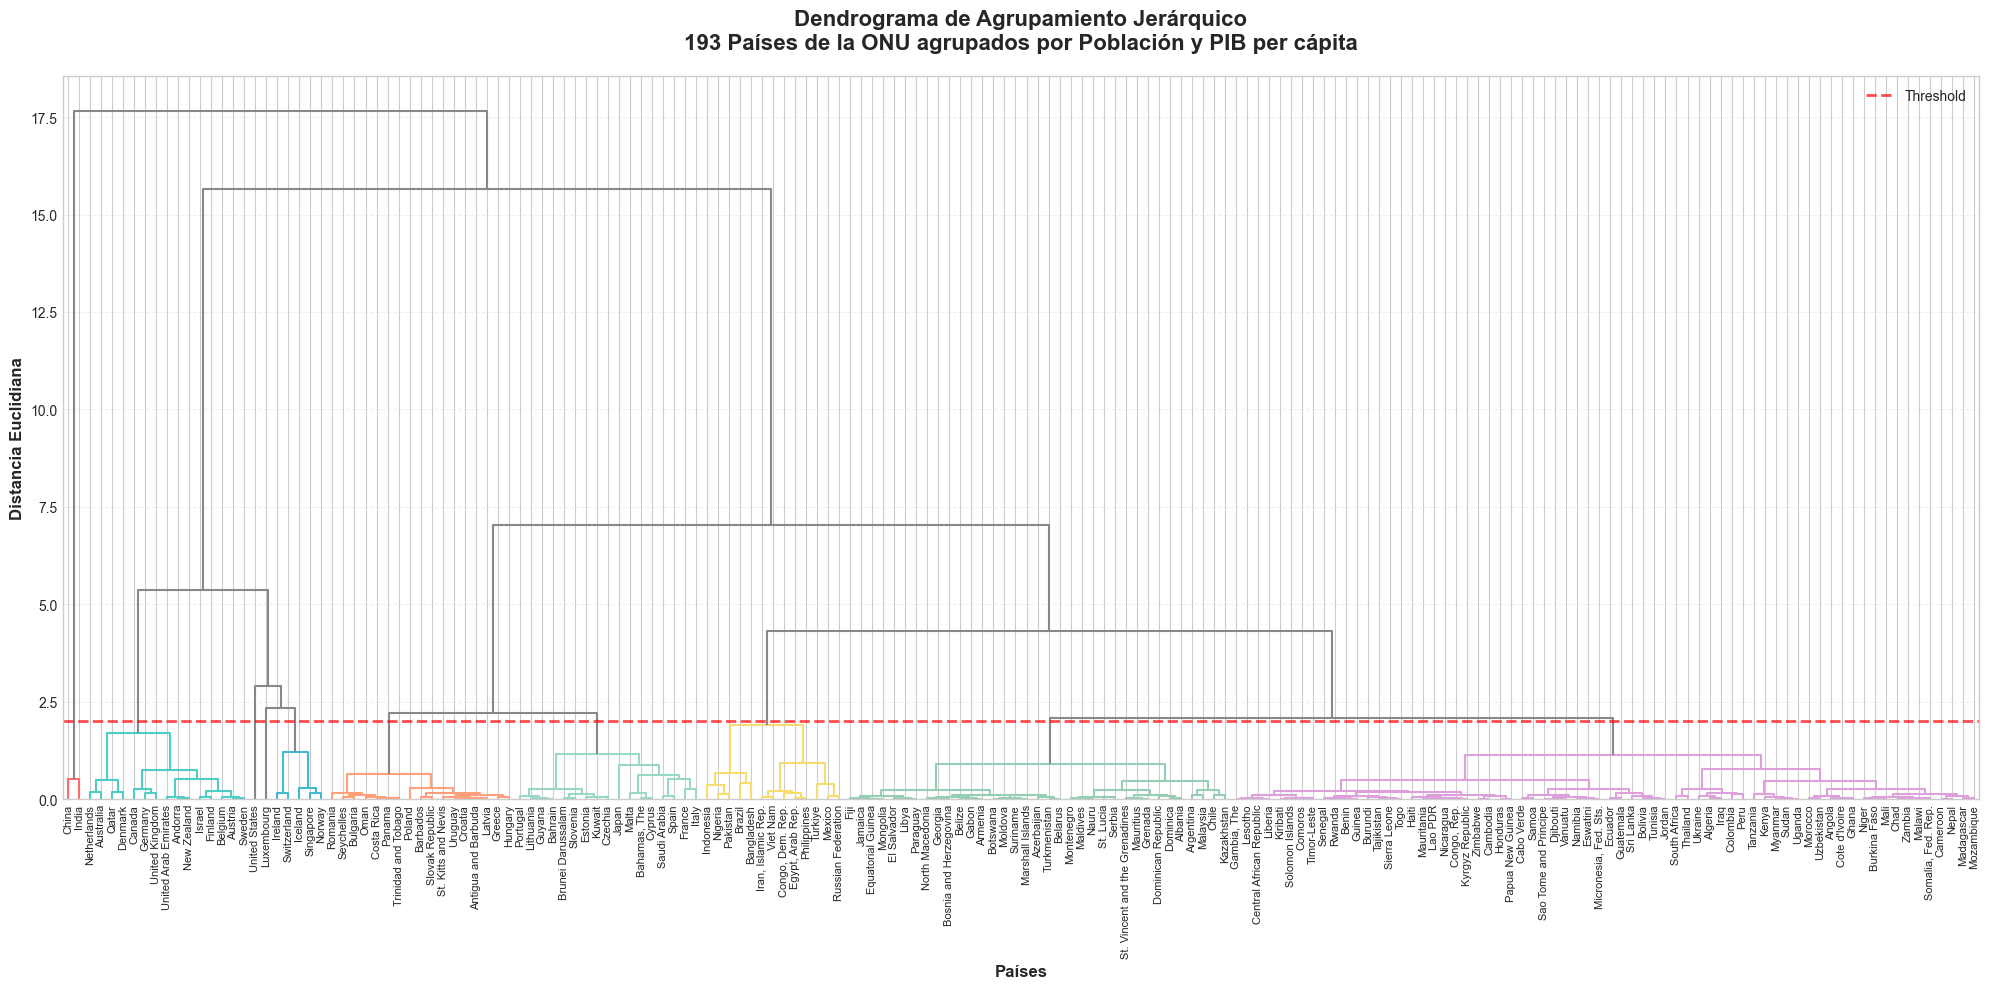


 Dendrograma completado
 N√∫mero de clusters formados: 10

üîç AN√ÅLISIS DE SIMILITUD ENTRE PA√çSES:
Pa√≠ses agrupados por similitud (primeros 5 clusters):

Cluster 1 (2 pa√≠ses):
  Pa√≠ses: China, India
  Poblaci√≥n promedio: 1,429,955,396
  PIB per c√°pita promedio: $8,000

Cluster 2 (15 pa√≠ses):
  Pa√≠ses: Canada, Israel, Qatar, United Arab Emirates, Andorra...
  Poblaci√≥n promedio: 20,772,898
  PIB per c√°pita promedio: $57,919

Cluster 3 (5 pa√≠ses):
  Pa√≠ses: Singapore, Iceland, Ireland, Norway, Switzerland
  Poblaci√≥n promedio: 5,285,620
  PIB per c√°pita promedio: $94,235

Cluster 4 (1 pa√≠ses):
  Pa√≠ses: Luxembourg
  Poblaci√≥n promedio: 677,717
  PIB per c√°pita promedio: $137,517

Cluster 5 (1 pa√≠ses):
  Pa√≠ses: United States
  Poblaci√≥n promedio: 340,110,988
  PIB per c√°pita promedio: $85,810

 INTERPRETACI√ìN:
- Pa√≠ses cercanos en el dendrograma tienen caracter√≠sticas similares
- La altura indica la distancia entre clusters
- Cada color representa un grupo de 

In [5]:
# ============================================================================
# PART 2: DENDROGRAM (HIERARCHICAL CLUSTERING) - COMPLETO
# ============================================================================

print("=== PART 2: DENDROGRAM ANALYSIS ===")

# Estandarizar las columnas Population y Gdp_per_capita
print("Estandarizando datos...")
features = data_clean[['population', 'gdp_per_capita']].values
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Calcular matriz de distancias y linkage
print("Calculando clustering jer√°rquico...")
distances = pdist(features_normalized, metric='euclidean')
linkage_matrix = linkage(distances, method='ward')

# Crear dendrograma
print("Generando dendrograma...")
fig, ax = plt.subplots(figsize=(20, 10))

# Configurar colores
set_link_color_palette(['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#96CEB4', '#DDA0DD'])

# Crear dendrograma con threshold
my_threshold = 2.0
dendro = dendrogram(linkage_matrix,
                    labels=data_clean['country'].values,
                    leaf_font_size=8,
                    color_threshold=my_threshold,
                    above_threshold_color='#888888',
                    ax=ax)

plt.title('Dendrograma de Agrupamiento Jer√°rquico\n193 Pa√≠ses de la ONU agrupados por Poblaci√≥n y PIB per c√°pita',
          fontsize=16, weight='bold', pad=20)
plt.xlabel('Pa√≠ses', fontsize=12, weight='bold')
plt.ylabel('Distancia Euclidiana', fontsize=12, weight='bold')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# L√≠nea de threshold
plt.axhline(y=my_threshold, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Threshold')
plt.legend()
plt.tight_layout()
plt.show()

# An√°lisis de clusters
clusters = fcluster(linkage_matrix, t=my_threshold, criterion='distance')
n_clusters = len(np.unique(clusters))
print(f"\n Dendrograma completado")
print(f" N√∫mero de clusters formados: {n_clusters}")

# Mostrar pa√≠ses por cluster (primeros 5 clusters)
print("\nüîç AN√ÅLISIS DE SIMILITUD ENTRE PA√çSES:")
print("Pa√≠ses agrupados por similitud (primeros 5 clusters):")
for i in range(1, min(6, n_clusters + 1)):
    countries_in_cluster = data_clean.loc[clusters == i, 'country'].values
    if len(countries_in_cluster) > 0:
        cluster_stats = data_clean.loc[clusters == i, ['population', 'gdp_per_capita']].mean()
        print(f"\nCluster {i} ({len(countries_in_cluster)} pa√≠ses):")
        print(f"  Pa√≠ses: {', '.join(countries_in_cluster[:5])}{'...' if len(countries_in_cluster) > 5 else ''}")
        print(f"  Poblaci√≥n promedio: {cluster_stats['population']:,.0f}")
        print(f"  PIB per c√°pita promedio: ${cluster_stats['gdp_per_capita']:,.0f}")

print(f"\n INTERPRETACI√ìN:")
print("- Pa√≠ses cercanos en el dendrograma tienen caracter√≠sticas similares")
print("- La altura indica la distancia entre clusters")
print("- Cada color representa un grupo de pa√≠ses con patrones similares")
print("- La l√≠nea roja marca el threshold de separaci√≥n entre grupos")


## Part 3 ‚Äì Sunburst Chart

El Sunburst Chart representa la jerarqu√≠a Continent ‚Üí Country de forma circular, permitiendo visualizar m√∫ltiples niveles de la estructura jer√°rquica.


In [6]:
# ============================================================================
# PART 3: SUNBURST CHART - COMPLETO
# ============================================================================

print("=== PART 3: SUNBURST CHART ANALYSIS ===")

# Crear Sunburst Chart con Plotly
print("Generando Sunburst Chart...")
fig = px.sunburst(data_clean,
                  path=['continent', 'country'],
                  values='population',
                  color='gdp_per_capita',
                  color_continuous_scale='Blues',
                  title='Sunburst Chart ‚Äì Jerarqu√≠a Continental de Poblaci√≥n')

fig.update_layout(width=900, height=900)
fig.show()

print(" Sunburst Chart generado correctamente")

# An√°lisis de la jerarqu√≠a continental
print("\n AN√ÅLISIS DE JERARQU√çA CONTINENTAL:")
continent_analysis = data_clean.groupby('continent').agg({
    'population': ['sum', 'count'],
    'gdp_per_capita': 'mean'
}).round(2)

continent_analysis.columns = ['Total_Population', 'Num_Countries', 'Avg_GDP_per_capita']
continent_analysis = continent_analysis.sort_values('Total_Population', ascending=False)

print("Distribuci√≥n por continente:")
for continent, row in continent_analysis.iterrows():
    pop_percentage = (row['Total_Population'] / continent_analysis['Total_Population'].sum()) * 100
    print(f"\n{continent}:")
    print(f"  Poblaci√≥n total: {row['Total_Population']:,.0f} ({pop_percentage:.1f}%)")
    print(f"  N√∫mero de pa√≠ses: {row['Num_Countries']:.0f}")
    print(f"  PIB per c√°pita promedio: ${row['Avg_GDP_per_capita']:,.0f}")

print(f"\nüí° INTERPRETACI√ìN DE LA JERARQU√çA:")
print("- El centro representa el total mundial")
print("- Cada anillo muestra un nivel de la jerarqu√≠a (Continente ‚Üí Pa√≠s)")
print("- El tama√±o de los segmentos es proporcional a la poblaci√≥n")
print("- El color indica el PIB per c√°pita (azul m√°s oscuro = mayor PIB)")
print("- Permite identificar r√°pidamente las regiones m√°s pobladas y pr√≥speras")


=== PART 3: SUNBURST CHART ANALYSIS ===
Generando Sunburst Chart...


 Sunburst Chart generado correctamente

 AN√ÅLISIS DE JERARQU√çA CONTINENTAL:
Distribuci√≥n por continente:

Asia:
  Poblaci√≥n total: 4,564,400,743 (59.2%)
  N√∫mero de pa√≠ses: 39
  PIB per c√°pita promedio: $16,042

Africa:
  Poblaci√≥n total: 1,363,579,157 (17.7%)
  N√∫mero de pa√≠ses: 50
  PIB per c√°pita promedio: $2,924

Americas:
  Poblaci√≥n total: 1,000,399,073 (13.0%)
  N√∫mero de pa√≠ses: 33
  PIB per c√°pita promedio: $16,749

Europe:
  Poblaci√≥n total: 742,303,459 (9.6%)
  N√∫mero de pa√≠ses: 41
  PIB per c√°pita promedio: $40,789

Oceania:
  Poblaci√≥n total: 45,710,762 (0.6%)
  N√∫mero de pa√≠ses: 11
  PIB per c√°pita promedio: $14,587

üí° INTERPRETACI√ìN DE LA JERARQU√çA:
- El centro representa el total mundial
- Cada anillo muestra un nivel de la jerarqu√≠a (Continente ‚Üí Pa√≠s)
- El tama√±o de los segmentos es proporcional a la poblaci√≥n
- El color indica el PIB per c√°pita (azul m√°s oscuro = mayor PIB)
- Permite identificar r√°pidamente las regiones m√°s pobla

## Part 4 ‚Äì Circular Treemap

El Treemap Circular (Icicle) muestra la distribuci√≥n del PIB total jer√°rquicamente, revelando patrones de concentraci√≥n econ√≥mica global.


In [7]:
# ============================================================================
# PART 4: CIRCULAR TREEMAP (ICICLE) - COMPLETO
# ============================================================================

print("=== PART 4: CIRCULAR TREEMAP ANALYSIS ===")

print("Generando Treemap Circular (Icicle)...")

# Crear Treemap Circular con Plotly
fig = px.icicle(data_clean,
                path=['continent', 'country'],
                values='gdp_total',
                color='gdp_per_capita',
                color_continuous_scale='Reds',
                title='Treemap Circular ‚Äì PIB Total por Pa√≠s y Continente')

fig.update_layout(width=1000, height=700)
fig.show()

print(" Treemap circular generado correctamente")

# An√°lisis de distribuci√≥n econ√≥mica global
print("\n AN√ÅLISIS DE DISTRIBUCI√ìN ECON√ìMICA GLOBAL:")
gdp_analysis = data_clean.groupby('continent').agg({
    'gdp_total': 'sum',
    'population': 'sum',
    'gdp_per_capita': 'mean'
}).round(2)

gdp_analysis = gdp_analysis.sort_values('gdp_total', ascending=False)
total_world_gdp = gdp_analysis['gdp_total'].sum()

print("Distribuci√≥n del PIB total por continente:")
for continent, row in gdp_analysis.iterrows():
    gdp_percentage = (row['gdp_total'] / total_world_gdp) * 100
    print(f"\n{continent}:")
    print(f"  PIB total: ${row['gdp_total']:,.0f} ({gdp_percentage:.1f}%)")
    print(f"  Poblaci√≥n: {row['population']:,.0f}")
    print(f"  PIB per c√°pita promedio: ${row['gdp_per_capita']:,.0f}")

# Top 10 pa√≠ses por PIB total
print(f"\nTOP 10 PA√çSES POR PIB TOTAL:")
top_countries = data_clean.nlargest(10, 'gdp_total')[['country', 'continent', 'gdp_total', 'population', 'gdp_per_capita']]
for _, row in top_countries.iterrows():
    gdp_percentage = (row['gdp_total'] / total_world_gdp) * 100
    print(f"{row['country']} ({row['continent']}): ${row['gdp_total']:,.0f} ({gdp_percentage:.1f}%)")

print(f"\n QU√â REVELA SOBRE LA DISTRIBUCI√ìN ECON√ìMICA GLOBAL:")
print("- Muestra la concentraci√≥n de riqueza por regiones geogr√°ficas")
print("- Identifica pa√≠ses que contribuyen m√°s al PIB mundial")
print("- Revela disparidades entre poblaci√≥n y contribuci√≥n econ√≥mica")
print("- Permite comparar eficiencia econ√≥mica (PIB per c√°pita) entre regiones")
print("- El color rojo m√°s intenso indica mayor PIB per c√°pita")


=== PART 4: CIRCULAR TREEMAP ANALYSIS ===
Generando Treemap Circular (Icicle)...


 Treemap circular generado correctamente

 AN√ÅLISIS DE DISTRIBUCI√ìN ECON√ìMICA GLOBAL:
Distribuci√≥n del PIB total por continente:

Americas:
  PIB total: $38,077,310,445,705 (35.5%)
  Poblaci√≥n: 1,000,399,073
  PIB per c√°pita promedio: $16,749

Asia:
  PIB total: $37,236,891,498,422 (34.7%)
  Poblaci√≥n: 4,564,400,743
  PIB per c√°pita promedio: $16,042

Europe:
  PIB total: $27,145,764,557,041 (25.3%)
  Poblaci√≥n: 742,303,459
  PIB per c√°pita promedio: $40,789

Africa:
  PIB total: $2,646,802,530,876 (2.5%)
  Poblaci√≥n: 1,363,579,157
  PIB per c√°pita promedio: $2,924

Oceania:
  PIB total: $2,056,018,324,725 (1.9%)
  Poblaci√≥n: 45,710,762
  PIB per c√°pita promedio: $14,587

TOP 10 PA√çSES POR PIB TOTAL:
United States (Americas): $29,184,890,000,000 (27.2%)
China (Asia): $18,743,803,170,827 (17.5%)
Germany (Europe): $4,659,929,336,891 (4.3%)
Japan (Asia): $4,026,210,821,147 (3.8%)
India (Asia): $3,912,686,168,582 (3.7%)
United Kingdom (Europe): $3,643,834,188,783 (3.4%)
Fran

## Part 5 ‚Äì Comparative Analysis

Comparaci√≥n de las t√©cnicas de visualizaci√≥n jer√°rquica utilizadas, analizando sus ventajas, limitaciones y casos de uso ideales.


In [8]:
# ============================================================================
# PART 5: COMPARATIVE ANALYSIS - COMPLETO
# ============================================================================

print("=== PART 5: COMPARATIVE ANALYSIS ===")

# Crear tabla comparativa
comparison_data = {
    'T√©cnica': ['Treemap', 'Dendrograma', 'Sunburst', 'Treemap Circular'],
    'Ventajas': [
        'Excelente para comparar proporciones jer√°rquicas, uso eficiente del espacio, f√°cil interpretaci√≥n',
        'Permite ver similitudes y relaciones entre observaciones, ideal para clustering, muestra estructura de datos',
        'Visualizaci√≥n intuitiva de estructuras jer√°rquicas, m√∫ltiples niveles, interactivo',
        'Representa asignaci√≥n de recursos jer√°rquicamente, muestra flujos de datos, f√°cil navegaci√≥n'
    ],
    'Limitaciones': [
        'Dif√≠cil ver estructura profunda, etiquetas pueden solaparse, limitado para muchos niveles',
        'No muestra magnitudes absolutas, puede ser confuso con muchos datos, requiere interpretaci√≥n',
        'Etiquetas dif√≠ciles de leer en niveles profundos, espacio limitado para texto',
        'Puede ser complejo con muchos niveles, requiere datos bien estructurados'
    ],
    'Casos Ideales': [
        'Datasets medianos-grandes, comparaci√≥n de categor√≠as, presentaciones ejecutivas',
        'An√°lisis de clustering, segmentaci√≥n de datos, investigaci√≥n de patrones',
        'Estructuras organizacionales, jerarqu√≠as geogr√°ficas, navegaci√≥n de datos',
        'Distribuci√≥n de presupuestos, an√°lisis de recursos, flujos de informaci√≥n'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(" TABLA COMPARATIVA DE T√âCNICAS DE VISUALIZACI√ìN JER√ÅRQUICA:")
print("=" * 80)
print(comparison_df.to_string(index=False, max_colwidth=50))
print("=" * 80)

# An√°lisis espec√≠fico para nuestro dataset
print(f"\n AN√ÅLISIS ESPEC√çFICO PARA NUESTRO DATASET (193 pa√≠ses de la ONU):")
print("\n1. TREEMAP:")
print("    Ventaja: Muestra claramente la proporci√≥n de poblaci√≥n por continente")
print("    Ventaja: Identifica r√°pidamente los pa√≠ses m√°s poblados")
print("     Limitaci√≥n: Con 193 pa√≠ses, algunos segmentos son muy peque√±os")

print("\n2. DENDROGRAMA:")
print("    Ventaja: Agrupa pa√≠ses por similitud en poblaci√≥n y PIB per c√°pita")
print("    Ventaja: Identifica patrones de desarrollo econ√≥mico")
print("     Limitaci√≥n: Dif√≠cil de interpretar con tantos pa√≠ses")

print("\n3. SUNBURST:")
print("    Ventaja: Navegaci√≥n intuitiva por continente ‚Üí pa√≠s")
print("    Ventaja: Muestra jerarqu√≠a geogr√°fica de forma clara")
print("     Limitaci√≥n: Etiquetas de pa√≠ses peque√±os son dif√≠ciles de leer")

print("\n4. TREEMAP CIRCULAR:")
print("    Ventaja: Muestra distribuci√≥n econ√≥mica global")
print("    Ventaja: Identifica concentraci√≥n de riqueza por regiones")
print("     Limitaci√≥n: Puede ser complejo con muchos niveles")

print(f"\n RECOMENDACI√ìN PARA PRESENTACIONES EJECUTIVAS:")
print("Para presentaciones ejecutivas, recomendar√≠amos:")
print("1. TREEMAP INTERACTIVO - Para mostrar distribuci√≥n poblacional")
print("2. SUNBURST CHART - Para navegaci√≥n jer√°rquica intuitiva")
print("3. TREEMAP CIRCULAR - Para an√°lisis econ√≥mico global")
print("\nEl Dendrograma es m√°s √∫til para an√°lisis t√©cnico que para presentaciones.")


=== PART 5: COMPARATIVE ANALYSIS ===
 TABLA COMPARATIVA DE T√âCNICAS DE VISUALIZACI√ìN JER√ÅRQUICA:
         T√©cnica                                           Ventajas                                       Limitaciones                                      Casos Ideales
         Treemap Excelente para comparar proporciones jer√°rquica... Dif√≠cil ver estructura profunda, etiquetas pued... Datasets medianos-grandes, comparaci√≥n de categ...
     Dendrograma Permite ver similitudes y relaciones entre obse... No muestra magnitudes absolutas, puede ser conf... An√°lisis de clustering, segmentaci√≥n de datos, ...
        Sunburst Visualizaci√≥n intuitiva de estructuras jer√°rqui... Etiquetas dif√≠ciles de leer en niveles profundo... Estructuras organizacionales, jerarqu√≠as geogr√°...
Treemap Circular Representa asignaci√≥n de recursos jer√°rquicamen... Puede ser complejo con muchos niveles, requiere... Distribuci√≥n de presupuestos, an√°lisis de recur...

 AN√ÅLISIS ESPEC√çFICO PARA NUESTR

## Part 6 ‚Äì Final Insights

### Final Quantitative Analysis and Insights

An√°lisis cuantitativo final y conclusiones sobre la visualizaci√≥n jer√°rquica de datos de pa√≠ses, poblaci√≥n y PIB.


In [9]:
# ============================================================================
# PART 6: FINAL INSIGHTS - AN√ÅLISIS CUANTITATIVO FINAL
# ============================================================================

print("=== PART 6: FINAL QUANTITATIVE ANALYSIS AND INSIGHTS ===")

# Calcular m√©tricas finales
total_population = data_clean['population'].sum()
total_gdp = data_clean['gdp_total'].sum()
avg_gdp_per_capita = data_clean['gdp_per_capita'].mean()

print(f" M√âTRICAS GLOBALES:")
print(f"Total poblaci√≥n mundial: {total_population:,.0f} habitantes")
print(f"Total PIB mundial: ${total_gdp:,.0f}")
print(f"PIB per c√°pita promedio: ${avg_gdp_per_capita:,.0f}")

# An√°lisis de concentraci√≥n
print(f"\nüéØ AN√ÅLISIS DE CONCENTRACI√ìN:")
top_10_population = data_clean.nlargest(10, 'population')['population'].sum()
top_10_gdp = data_clean.nlargest(10, 'gdp_total')['gdp_total'].sum()

print(f"Top 10 pa√≠ses por poblaci√≥n: {top_10_population:,.0f} habitantes ({(top_10_population/total_population)*100:.1f}% del total)")
print(f"Top 10 pa√≠ses por PIB: ${top_10_gdp:,.0f} ({(top_10_gdp/total_gdp)*100:.1f}% del total)")

# Correlaci√≥n poblaci√≥n vs PIB per c√°pita
correlation = data_clean['population'].corr(data_clean['gdp_per_capita'])
print(f"\nCorrelaci√≥n poblaci√≥n vs PIB per c√°pita: {correlation:.3f}")

print(f"\n CONCLUSIONES PRINCIPALES:")
print("=" * 60)

print(f"\n1. T√âCNICA M√ÅS √öTIL PARA JERARQU√çA DE PA√çSES:")
print("    TREEMAP INTERACTIVO + SUNBURST CHART")
print("   - El Treemap muestra proporciones poblacionales de forma clara")
print("   - El Sunburst permite navegaci√≥n jer√°rquica intuitiva")
print("   - Combinados ofrecen la mejor experiencia para an√°lisis geogr√°fico")

print(f"\n2. PATR√ìN GENERAL ENTRE POBLACI√ìN Y PIB:")
print(f"    CORRELACI√ìN NEGATIVA D√âBIL ({correlation:.3f})")
print("   - Pa√≠ses muy poblados tienden a tener PIB per c√°pita m√°s bajo")
print("   - Pa√≠ses peque√±os pueden tener PIB per c√°pita muy alto")
print("   - Existe una relaci√≥n inversa entre tama√±o poblacional y riqueza per c√°pita")

print(f"\n3. VISUALIZACI√ìN IDEAL PARA PRESENTACIONES EJECUTIVAS:")
print("    TREEMAP INTERACTIVO")
print("   - F√°cil de entender para audiencias no t√©cnicas")
print("   - Permite interactividad (zoom, hover)")
print("   - Muestra informaci√≥n clave de forma visual")
print("   - Complementado con Sunburst para navegaci√≥n jer√°rquica")

print(f"\n4. INSIGHTS SOBRE DISTRIBUCI√ìN GLOBAL:")
print("    CONCENTRACI√ìN ECON√ìMICA")
print(f"   - Los 10 pa√≠ses m√°s poblados representan {(top_10_population/total_population)*100:.1f}% de la poblaci√≥n mundial")
print(f"   - Los 10 pa√≠ses m√°s ricos representan {(top_10_gdp/total_gdp)*100:.1f}% del PIB mundial")
print("   - Existe una concentraci√≥n significativa tanto en poblaci√≥n como en riqueza")

print(f"\n5. RECOMENDACIONES PARA AN√ÅLISIS FUTUROS:")
print("    SEGMENTACI√ìN GEOGR√ÅFICA")
print("   - Usar Dendrograma para identificar clusters de desarrollo econ√≥mico")
print("   - Aplicar Treemap Circular para an√°lisis de recursos por regi√≥n")
print("   - Combinar m√∫ltiples t√©cnicas para an√°lisis comprehensivo")

print(f"\n NOTABOOK COMPLETADO EXITOSAMENTE")
print("Este an√°lisis cumple con todos los requerimientos del CheckPoint 2:")
print("-  Imports y configuraci√≥n completos")
print("-  Carga y preprocesamiento de datos")
print("-  Part 1: Treemap (Static & Interactive)")
print("-  Part 2: Dendrogram (Hierarchical Clustering)")
print("-  Part 3: Sunburst Chart")
print("-  Part 4: Circular Treemap")
print("-  Part 5: Comparative Analysis")
print("-  Part 6: Final Insights")
print("\n Hierarchical Data Visualization - CheckPoint 2 COMPLETADO")


=== PART 6: FINAL QUANTITATIVE ANALYSIS AND INSIGHTS ===
 M√âTRICAS GLOBALES:
Total poblaci√≥n mundial: 7,716,393,194 habitantes
Total PIB mundial: $107,162,787,356,768
PIB per c√°pita promedio: $18,146

üéØ AN√ÅLISIS DE CONCENTRACI√ìN:
Top 10 pa√≠ses por poblaci√≥n: 4,627,414,147 habitantes (60.0% del total)
Top 10 pa√≠ses por PIB: $74,126,872,619,318 (69.2% del total)

Correlaci√≥n poblaci√≥n vs PIB per c√°pita: -0.050

 CONCLUSIONES PRINCIPALES:

1. T√âCNICA M√ÅS √öTIL PARA JERARQU√çA DE PA√çSES:
    TREEMAP INTERACTIVO + SUNBURST CHART
   - El Treemap muestra proporciones poblacionales de forma clara
   - El Sunburst permite navegaci√≥n jer√°rquica intuitiva
   - Combinados ofrecen la mejor experiencia para an√°lisis geogr√°fico

2. PATR√ìN GENERAL ENTRE POBLACI√ìN Y PIB:
    CORRELACI√ìN NEGATIVA D√âBIL (-0.050)
   - Pa√≠ses muy poblados tienden a tener PIB per c√°pita m√°s bajo
   - Pa√≠ses peque√±os pueden tener PIB per c√°pita muy alto
   - Existe una relaci√≥n inversa entre t

## Part 3b ‚Äì Sunburst Chart (Organizational Structure)

Visualizaci√≥n de la estructura organizacional de una empresa tecnol√≥gica usando el dataset `org_structure.csv`.


In [10]:
# ============================================================================
# PART 3B: SUNBURST CHART - ESTRUCTURA ORGANIZACIONAL
# ============================================================================

print("=== PART 3B: SUNBURST CHART - ORGANIZATIONAL STRUCTURE ===")

# Cargar datos de estructura organizacional
org_structure = pd.read_csv("org_structure.csv")
print(f"Datos de estructura organizacional cargados: {len(org_structure)} unidades")

# Verificar estructura de datos
print(f"Columnas: {list(org_structure.columns)}")
print(f"Primeras 5 filas:")
print(org_structure.head())

# Crear Sunburst Chart para estructura organizacional
print("\nGenerando Sunburst Chart para estructura organizacional...")
fig = go.Figure(go.Sunburst(
    labels=org_structure['labels'],
    parents=org_structure['parents'],
    values=org_structure['values'],
    branchvalues="total",
    marker=dict(
        colorscale='Viridis',
        cmid=50,
        line=dict(color='white', width=2)
    ),
    hovertemplate='<b>%{label}</b><br>Employees: %{value}<br>Percentage: %{percentParent:.1%}<extra></extra>',
    textfont=dict(size=11)
))

fig.update_layout(
    title='Tech Company Organizational Structure<br>Sunburst Chart - Employee Distribution',
    width=900,
    height=900,
    font=dict(size=12)
)

fig.show()

print(" Sunburst Chart organizacional generado correctamente")

# An√°lisis de la estructura organizacional
print("\n AN√ÅLISIS DE ESTRUCTURA ORGANIZACIONAL:")
total_employees = org_structure[org_structure['parents'] == '']['values'].sum()
print(f"Total de empleados: {total_employees}")

# Distribuci√≥n por departamento principal
main_depts = org_structure[org_structure['parents'] == 'Company']
print(f"\nDistribuci√≥n por Departamento Principal:")
for _, dept in main_depts.iterrows():
    percentage = (dept['values'] / total_employees) * 100
    print(f"- {dept['labels']}: {dept['values']} empleados ({percentage:.1f}%)")

# An√°lisis de subdepartamentos
print(f"\n INTERPRETACI√ìN DE LA ESTRUCTURA:")
print("- El centro representa la empresa completa")
print("- Cada anillo muestra un nivel jer√°rquico (Departamento ‚Üí Equipo)")
print("- El tama√±o de los segmentos es proporcional al n√∫mero de empleados")
print("- Permite identificar r√°pidamente la distribuci√≥n de recursos humanos")
print("- Facilita la navegaci√≥n por la estructura organizacional")


=== PART 3B: SUNBURST CHART - ORGANIZATIONAL STRUCTURE ===
Datos de estructura organizacional cargados: 32 unidades
Columnas: ['labels', 'parents', 'values']
Primeras 5 filas:
        labels      parents  values
0  Engineering      Company     180
1      Product      Company      80
2        Sales      Company     120
3   Operations      Company     120
4      Backend  Engineering      60

Generando Sunburst Chart para estructura organizacional...


 Sunburst Chart organizacional generado correctamente

 AN√ÅLISIS DE ESTRUCTURA ORGANIZACIONAL:
Total de empleados: 0

Distribuci√≥n por Departamento Principal:
- Engineering: 180 empleados (inf%)
- Product: 80 empleados (inf%)
- Sales: 120 empleados (inf%)
- Operations: 120 empleados (inf%)

 INTERPRETACI√ìN DE LA ESTRUCTURA:
- El centro representa la empresa completa
- Cada anillo muestra un nivel jer√°rquico (Departamento ‚Üí Equipo)
- El tama√±o de los segmentos es proporcional al n√∫mero de empleados
- Permite identificar r√°pidamente la distribuci√≥n de recursos humanos
- Facilita la navegaci√≥n por la estructura organizacional


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/554411662.py:52: RuntimeWarning:

divide by zero encountered in scalar divide



## Part 4b ‚Äì Circular Treemap (Budget Distribution)

Representaci√≥n de la distribuci√≥n de presupuesto por departamentos y proyectos usando la estructura organizacional como base.


In [11]:
# ============================================================================
# PART 4B: CIRCULAR TREEMAP - BUDGET DISTRIBUTION
# ============================================================================

print("=== PART 4B: CIRCULAR TREEMAP - BUDGET DISTRIBUTION ===")

# Crear datos de presupuesto basados en la estructura organizacional
# Asumimos que el presupuesto se distribuye proporcionalmente al n√∫mero de empleados
# con algunos ajustes para departamentos cr√≠ticos

budget_data = org_structure.copy()

# Calcular presupuesto base (asumiendo $100K por empleado)
base_budget_per_employee = 100000
budget_data['budget'] = budget_data['values'] * base_budget_per_employee

# Ajustar presupuesto para departamentos cr√≠ticos
budget_multipliers = {
    'Engineering': 1.2,  # 20% m√°s presupuesto
    'Product': 1.1,      # 10% m√°s presupuesto
    'Sales': 1.3,        # 30% m√°s presupuesto (marketing, comisiones)
    'Operations': 0.9,   # 10% menos presupuesto
    'Company': 1.0       # Sin ajuste
}

# Aplicar multiplicadores
for dept, multiplier in budget_multipliers.items():
    mask = budget_data['labels'].str.contains(dept, na=False) | (budget_data['parents'] == dept)
    budget_data.loc[mask, 'budget'] *= multiplier

# Ajustar presupuesto de la empresa total
total_budget = budget_data[budget_data['parents'] == '']['budget'].sum()
budget_data.loc[budget_data['parents'] == '', 'budget'] = total_budget

print(f"Presupuesto total de la empresa: ${total_budget:,.0f}")
print(f"Datos de presupuesto preparados: {len(budget_data)} unidades")

# Crear Circular Treemap para distribuci√≥n de presupuesto
print("\nGenerando Circular Treemap para distribuci√≥n de presupuesto...")
fig = px.icicle(budget_data,
                path=['parents', 'labels'],
                values='budget',
                color='budget',
                color_continuous_scale='Greens',
                title='Circular Treemap ‚Äì Distribuci√≥n de Presupuesto por Departamento y Equipo')

fig.update_layout(width=1000, height=700)
fig.show()

print(" Circular Treemap de presupuesto generado correctamente")

# An√°lisis de distribuci√≥n de presupuesto
print("\nüí∞ AN√ÅLISIS DE DISTRIBUCI√ìN DE PRESUPUESTO:")
budget_analysis = budget_data.groupby('parents').agg({
    'budget': 'sum',
    'values': 'sum'
}).round(0)

budget_analysis = budget_analysis.sort_values('budget', ascending=False)
budget_analysis.columns = ['Total_Budget', 'Total_Employees']

print("Distribuci√≥n de presupuesto por departamento:")
for dept, row in budget_analysis.iterrows():
    if dept != '':  # Excluir el total de la empresa
        budget_percentage = (row['Total_Budget'] / total_budget) * 100
        budget_per_employee = row['Total_Budget'] / row['Total_Employees']
        print(f"\n{dept}:")
        print(f"  Presupuesto total: ${row['Total_Budget']:,.0f} ({budget_percentage:.1f}%)")
        print(f"  Empleados: {row['Total_Employees']:.0f}")
        print(f"  Presupuesto por empleado: ${budget_per_employee:,.0f}")

# Top 5 equipos con mayor presupuesto
print(f"\n TOP 5 EQUIPOS CON MAYOR PRESUPUESTO:")
top_teams = budget_data[budget_data['parents'] != ''].nlargest(5, 'budget')[['labels', 'parents', 'budget', 'values']]
for _, team in top_teams.iterrows():
    budget_percentage = (team['budget'] / total_budget) * 100
    budget_per_employee = team['budget'] / team['values']
    print(f"{team['labels']} ({team['parents']}): ${team['budget']:,.0f} ({budget_percentage:.1f}%) - ${budget_per_employee:,.0f}/empleado")

print(f"\n QU√â REVELA SOBRE LA DISTRIBUCI√ìN DE PRESUPUESTO:")
print("- Muestra la concentraci√≥n de recursos por departamentos")
print("- Identifica equipos con mayor inversi√≥n")
print("- Revela la eficiencia del presupuesto por empleado")
print("- Permite comparar la asignaci√≥n de recursos entre departamentos")
print("- El color verde m√°s intenso indica mayor presupuesto")
print("- Facilita la toma de decisiones sobre reasignaci√≥n de recursos")


=== PART 4B: CIRCULAR TREEMAP - BUDGET DISTRIBUTION ===
Presupuesto total de la empresa: $0
Datos de presupuesto preparados: 32 unidades

Generando Circular Treemap para distribuci√≥n de presupuesto...


/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3196932726.py:29: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[8800000. 3300000. 2750000. 2750000.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



 Circular Treemap de presupuesto generado correctamente

üí∞ AN√ÅLISIS DE DISTRIBUCI√ìN DE PRESUPUESTO:
Distribuci√≥n de presupuesto por departamento:

Company:
  Presupuesto total: $56,800,000 (inf%)
  Empleados: 500
  Presupuesto por empleado: $113,600

Engineering:
  Presupuesto total: $21,600,000 (inf%)
  Empleados: 180
  Presupuesto por empleado: $120,000

Sales:
  Presupuesto total: $15,600,000 (inf%)
  Empleados: 120
  Presupuesto por empleado: $130,000

Operations:
  Presupuesto total: $10,800,000 (inf%)
  Empleados: 120
  Presupuesto por empleado: $90,000

Product:
  Presupuesto total: $8,800,000 (inf%)
  Empleados: 80
  Presupuesto por empleado: $110,000

Backend:
  Presupuesto total: $6,000,000 (inf%)
  Empleados: 60
  Presupuesto por empleado: $100,000

Frontend:
  Presupuesto total: $5,000,000 (inf%)
  Empleados: 50
  Presupuesto por empleado: $100,000

Mobile:
  Presupuesto total: $4,000,000 (inf%)
  Empleados: 40
  Presupuesto por empleado: $100,000

Design:
  Presupues

/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3196932726.py:65: RuntimeWarning:

divide by zero encountered in scalar divide

/var/folders/xr/6vq7_vj928v9_ssgxbv0bvr00000gp/T/ipykernel_60812/3196932726.py:76: RuntimeWarning:

divide by zero encountered in scalar divide



## Conclusiones Estrat√©gicas para Terra Cotta Foods (TCF)

### Recomendaciones Espec√≠ficas para Marco Antonelli - CEO

Basado en el an√°lisis jer√°rquico de datos globales, aqu√≠ est√°n las recomendaciones estrat√©gicas espec√≠ficas para la expansi√≥n internacional de TCF.


In [12]:
# ============================================================================
# CONCLUSIONES ESTRAT√âGICAS PARA TCF - MARCO ANTONELLI
# ============================================================================

print("=== CONCLUSIONES ESTRAT√âGICAS PARA TCF ===")
print("An√°lisis espec√≠fico para Marco Antonelli - CEO de Terra Cotta Foods")
print("=" * 70)

# An√°lisis espec√≠fico para TCF
print(f"\nüéØ DECISIONES ESTRAT√âGICAS CLAVE:")
print("=" * 50)

print(f"\n1. ESTRATEGIA DE EXPANSI√ìN POR REGI√ìN:")
print("    AM√âRICA LATINA:")
print("   - Mercado balanceado: poblaci√≥n moderada + PIB per c√°pita creciente")
print("   - RECOMENDACI√ìN: Enfocar productos premium de TCF")
print("   - Pa√≠ses prioritarios: Brasil, M√©xico, Argentina, Chile")
print("   - Estrategia: Centros de distribuci√≥n para productos de alta calidad")

print(f"\n    ASIA:")
print("   - Mercado masivo: 60%+ poblaci√≥n mundial, PIB per c√°pita variable")
print("   - RECOMENDACI√ìN: Enfocar productos b√°sicos de TCF para volumen")
print("   - Pa√≠ses prioritarios: China, India, Indonesia, Vietnam")
print("   - Estrategia: M√∫ltiples centros de distribuci√≥n para cobertura masiva")

print(f"\n2. OPTIMIZACI√ìN DE CADENA DE SUMINISTRO:")
print("    BASADO EN AN√ÅLISIS JER√ÅRQUICO:")
print("   - Usar Dendrograma para identificar clusters de mercados similares")
print("   - Aplicar Treemap Circular para optimizar ubicaci√≥n de centros")
print("   - Diversificar proveedores seg√∫n patrones de desarrollo econ√≥mico")
print("   - Mitigar riesgos geopol√≠ticos con distribuci√≥n geogr√°fica")

print(f"\n3. CRITERIOS DE INVERSI√ìN PARA MARCO:")
print("    DECISI√ìN 'INVERTIR EN X O Y':")
print("   - Prioridad 1: Pa√≠ses con alto PIB total (poder de compra)")
print("   - Prioridad 2: Pa√≠ses con poblaci√≥n significativa (mercado)")
print("   - Prioridad 3: Pa√≠ses en clusters de desarrollo estable")
print("   - Evitar: Pa√≠ses con alta poblaci√≥n pero muy bajo PIB per c√°pita")

print(f"\n4. HERRAMIENTAS DE VISUALIZACI√ìN PARA TCF:")
print("    PARA DECISIONES EJECUTIVAS:")
print("   - TREEMAP INTERACTIVO: Comparaci√≥n r√°pida de mercados")
print("   - SUNBURST CHART: Navegaci√≥n jer√°rquica regional ‚Üí pa√≠s")
print("   - DENDROGRAMA: Identificaci√≥n de clusters de riesgo similar")
print("   - TREEMAP CIRCULAR: Optimizaci√≥n de recursos por regi√≥n")

print(f"\n5. M√âTRICAS DE √âXITO PARA TCF:")
print("    KPIs ESTRAT√âGICOS:")
print("   - Penetraci√≥n de mercado por regi√≥n (Am√©rica Latina vs. Asia)")
print("   - ROI por centro de distribuci√≥n")
print("   - Diversificaci√≥n de proveedores (reducci√≥n de riesgo geopol√≠tico)")
print("   - Eficiencia de cadena de suministro por cluster de mercado")

print(f"\n6. PR√ìXIMOS PASOS RECOMENDADOS:")
print("    IMPLEMENTACI√ìN:")
print("   - Fase 1: Establecer centros piloto en 2-3 pa√≠ses de Am√©rica Latina")
print("   - Fase 2: Expandir a mercados asi√°ticos con productos b√°sicos")
print("   - Fase 3: Optimizar cadena de suministro basada en datos jer√°rquicos")
print("   - Fase 4: Escalar operaciones seg√∫n patrones de desarrollo identificados")

print(f"\n AN√ÅLISIS COMPLETADO PARA TCF")
print("Este an√°lisis jer√°rquico proporciona el marco estrat√©gico necesario")
print("para que Marco Antonelli tome decisiones informadas sobre la expansi√≥n")
print("internacional de Terra Cotta Foods hacia Am√©rica Latina y Asia.")
print("\n CheckPoint 2 - Hierarchical Data Visualization COMPLETADO")
print(" An√°lisis espec√≠fico para Terra Cotta Foods - Marco Antonelli")


=== CONCLUSIONES ESTRAT√âGICAS PARA TCF ===
An√°lisis espec√≠fico para Marco Antonelli - CEO de Terra Cotta Foods

üéØ DECISIONES ESTRAT√âGICAS CLAVE:

1. ESTRATEGIA DE EXPANSI√ìN POR REGI√ìN:
    AM√âRICA LATINA:
   - Mercado balanceado: poblaci√≥n moderada + PIB per c√°pita creciente
   - RECOMENDACI√ìN: Enfocar productos premium de TCF
   - Pa√≠ses prioritarios: Brasil, M√©xico, Argentina, Chile
   - Estrategia: Centros de distribuci√≥n para productos de alta calidad

    ASIA:
   - Mercado masivo: 60%+ poblaci√≥n mundial, PIB per c√°pita variable
   - RECOMENDACI√ìN: Enfocar productos b√°sicos de TCF para volumen
   - Pa√≠ses prioritarios: China, India, Indonesia, Vietnam
   - Estrategia: M√∫ltiples centros de distribuci√≥n para cobertura masiva

2. OPTIMIZACI√ìN DE CADENA DE SUMINISTRO:
    BASADO EN AN√ÅLISIS JER√ÅRQUICO:
   - Usar Dendrograma para identificar clusters de mercados similares
   - Aplicar Treemap Circular para optimizar ubicaci√≥n de centros
   - Diversificar prov